In [11]:
# imports from predefined functions
from database_pulls import query_reader
from sentiment_analysis import vader_analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
database = 'airbnb2.db'

query_location = """
SELECT listing_id, latitude, longitude, comments, REPLACE(price, '$', '') as price, neighbourhood_cleansed
FROM reviews JOIN listings ON reviews.listing_id = listings.id;
"""

# Creates / filters Dataframe, finds sentiment score /// This takes some time
df_location = query_reader(query_location, database)
df_location['scores'] = df_location['comments'].apply(vader_analysis)
df_location['price'] = df_location['price'].str.replace(',', '', regex=True).astype(float)

In [36]:
df_location.head()

,listing_id,latitude,longitude,comments,price,neighbourhood_cleansed,scores
0,3781,42.36413,-71.02991,The apartment was as advertised and Frank was ...,132.0,East Boston,0.8070
1,3781,42.36413,-71.02991,It was a pleasure to stay at Frank's place. Th...,132.0,East Boston,0.5719
2,3781,42.36413,-71.02991,The apartment description is entirely faithful...,132.0,East Boston,0.9537
3,3781,42.36413,-71.02991,Thoroughly enjoyed my time at Frank's home. Ha...,132.0,East Boston,0.9780
4,3781,42.36413,-71.02991,Great value for the money! This location has e...,132.0,East Boston,0.9263


In [39]:
df_location.listing_id.value_counts()

listing_id
4090224               821
815639                761
18290558              758
916123                750
18584891              691
                     ... 
638491618000627769      1
638473569363708335      1
677637597503515284      1
43032495                1
731257486642956305      1
Name: count, Length: 2741, dtype: int64

In [40]:
df_location.listing_id == 409224

0         False
1         False
2         False
3         False
4         False
          ...  
162911    False
162912    False
162913    False
162914    False
162915    False
Name: listing_id, Length: 162876, dtype: bool

In [30]:
# This filters out the exact zero scores, which aren't processed
df_loc = df_location[df_location['scores'] != 0 ]

In [25]:
len(df_location), len(df_loc)

(162876, 156275)

In [23]:
df_loc.head()

,latitude,longitude,comments,price,neighbourhood_cleansed,scores
0,42.36413,-71.02991,The apartment was as advertised and Frank was ...,132.0,East Boston,0.8070
1,42.36413,-71.02991,It was a pleasure to stay at Frank's place. Th...,132.0,East Boston,0.5719
2,42.36413,-71.02991,The apartment description is entirely faithful...,132.0,East Boston,0.9537
3,42.36413,-71.02991,Thoroughly enjoyed my time at Frank's home. Ha...,132.0,East Boston,0.9780
4,42.36413,-71.02991,Great value for the money! This location has e...,132.0,East Boston,0.9263


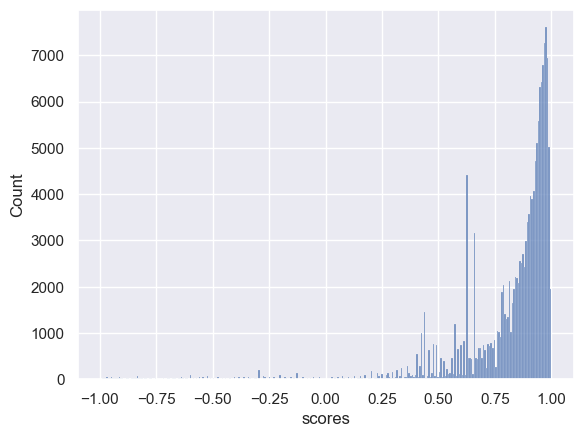

In [33]:
sns.set()
sns.histplot(df_loc.scores)
#sns.histplot(df_loc.price)
plt.show()

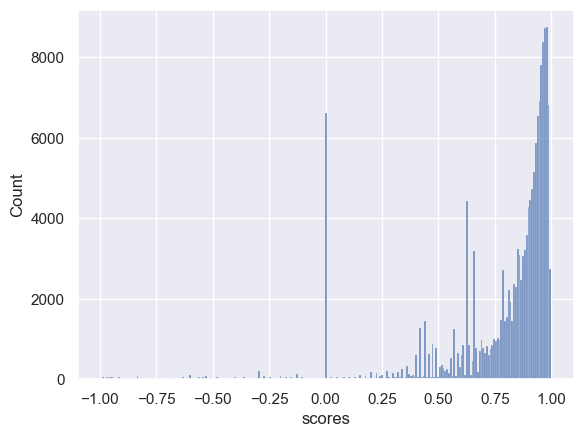

In [15]:
sns.set()
sns.histplot(df_location.scores)
plt.show()